In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading test data set.
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory Data Analysis

In [3]:
# size of dataset.
df.shape

(32560, 15)

##### This dataset contains 32560 rows and 15 columns, out of which one column represents the target variable and the remaining columns are independent variables.

In [4]:
# list of columns.
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
# Finding the unique value of each columns.
for col in df.columns:
    print(f'{col}', df[col].unique(), '\n')

Age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

Workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Fnlwgt [ 83311 215646 234721 ...  34066  84661 257302] 

Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing'

In [6]:
# We have noticed white space present in data set.
df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)

In [7]:
# Again finding the unique value of each columns.
for col in df.columns:
    print(f'{col}', df[col].unique(), '\n')

Age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

Workclass ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

Fnlwgt [ 83311 215646 234721 ...  34066  84661 257302] 

Education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

Education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

Marital_status ['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

Occupation ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 

In [8]:
# finding null values.
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
# Checking the data type.
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
# Displaying the updated dataset.
df.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### Notice that the dataset contains ? and 0 values. Therefore, we need to identify and fetch all columns that include these values.

In [11]:
# Occupation, Workclass contained '?'
print(df['Workclass'].value_counts(), '\n')

print(df['Occupation'].value_counts())

Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [12]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [13]:
# Displaying.
print(df['Workclass'].value_counts(), '\n')

print(df['Occupation'].value_counts())

Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [14]:
# finding null values.
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [15]:
# Now replacing the zero's with NaNs.
df.replace(0, np.nan, inplace=True)

In [16]:
# finding null values.
df.isna().sum()

Age                   0
Workclass          1836
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation         1843
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country      583
Income                0
dtype: int64

In [17]:
# Fill missing values based on column type
for column in df.columns[:-1]:
    if df[column].dtype == 'object':  # Categorical columns
        # Fill with the mode (most frequent value)
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:  # Numerical columns
        # Fill with the median (could use mean as well)
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

In [18]:
# finding null values.
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [19]:
# Observing the non-null values present in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  object 
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  object 
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  object 
 6   Occupation      32560 non-null  object 
 7   Relationship    32560 non-null  object 
 8   Race            32560 non-null  object 
 9   Sex             32560 non-null  object 
 10  Capital_gain    32560 non-null  float64
 11  Capital_loss    32560 non-null  float64
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  object 
 14  Income          32560 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


<Axes: >

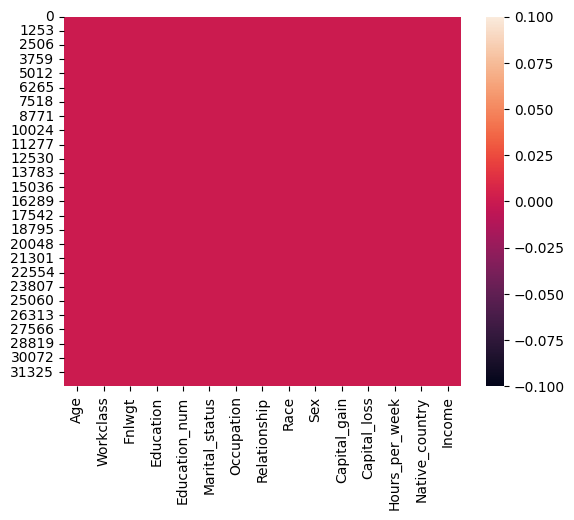

In [20]:
# The presence of non-null values is represented by the heatmap.
sns.heatmap(df.isnull())

In [21]:
# Replacing the object type value into integer value.
df.loc[ df['Income'] == '<=50K', 'Income']= 0
df.loc[ df['Income'] == '>50K', 'Income']= 1

In [22]:
# Short information.
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,7767.971499,1886.273557,40.437469
std,13.640642,1.055498e+05,2.572709,6647.552420,81.377016,12.347618
min,17.000000,1.228500e+04,1.000000,114.000000,155.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,7298.000000,1887.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,7298.000000,1887.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,7298.000000,1887.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### We can observe the data, which shows that there are non-null columns present, along with skewness and outliers. Let's take a closer look and examine these observations further.

# Encoding categorial columns using OrdinalEncodes

In [23]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

#### Distribution and Skewness

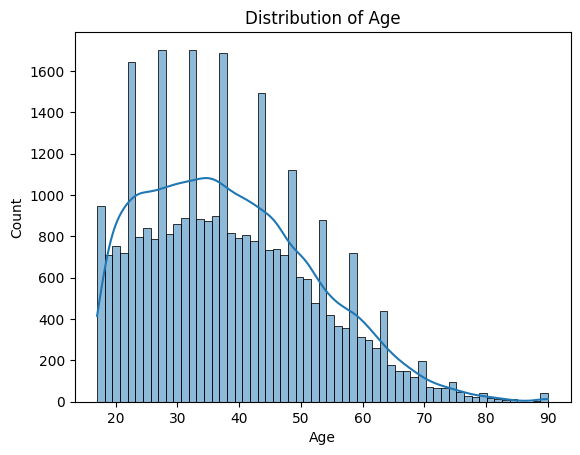

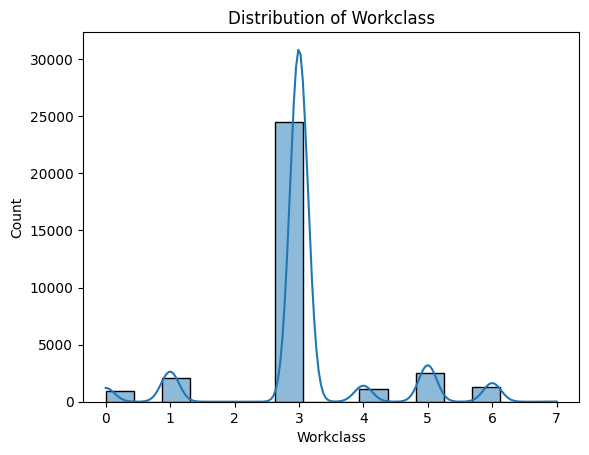

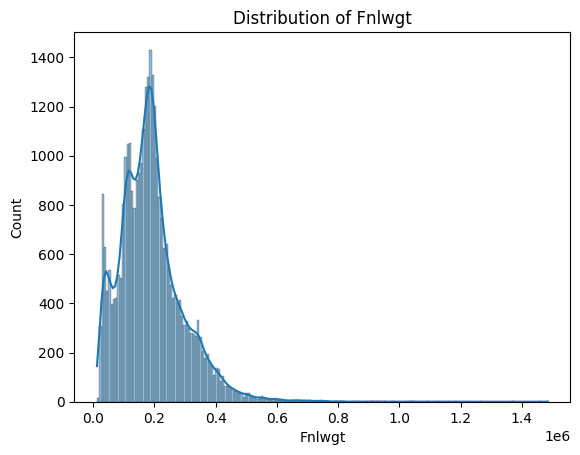

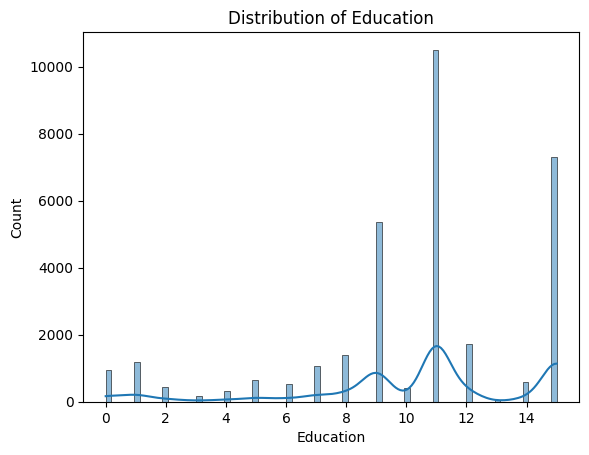

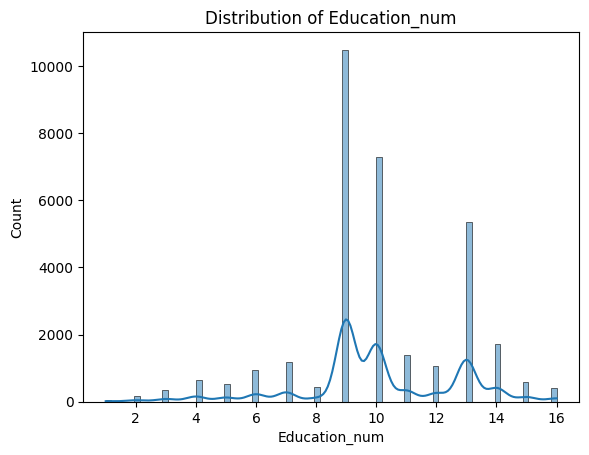

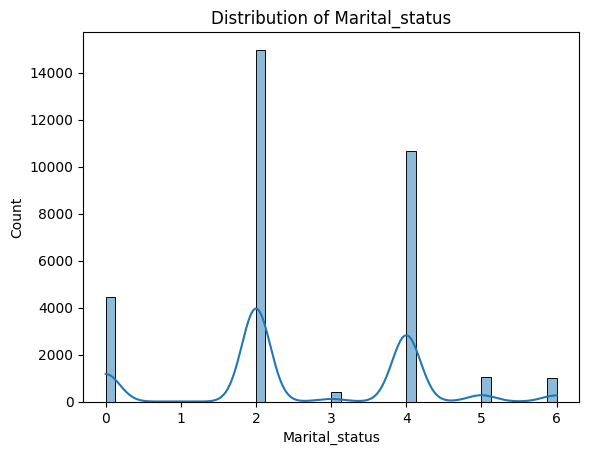

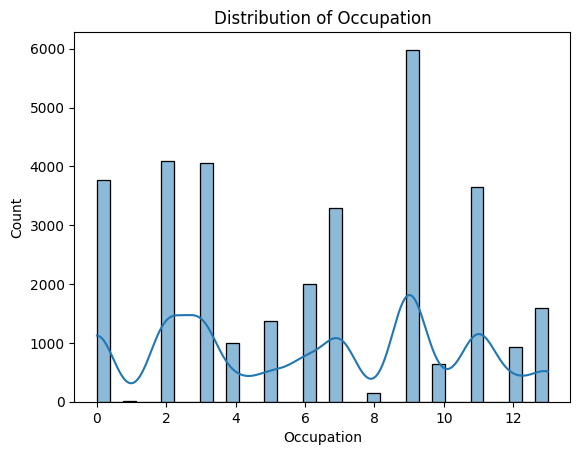

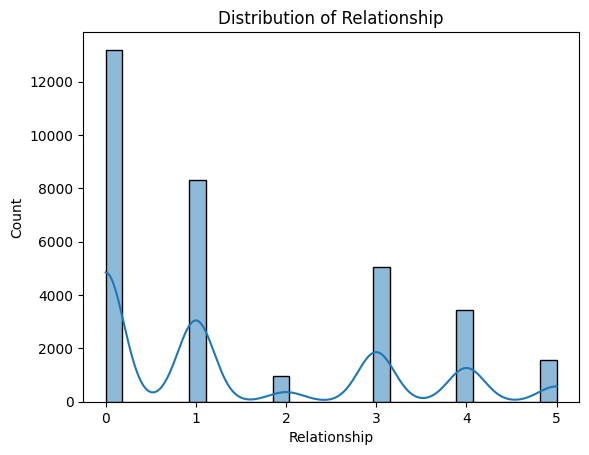

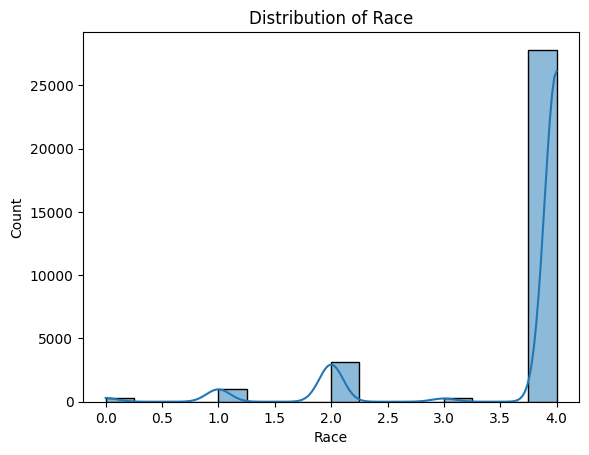

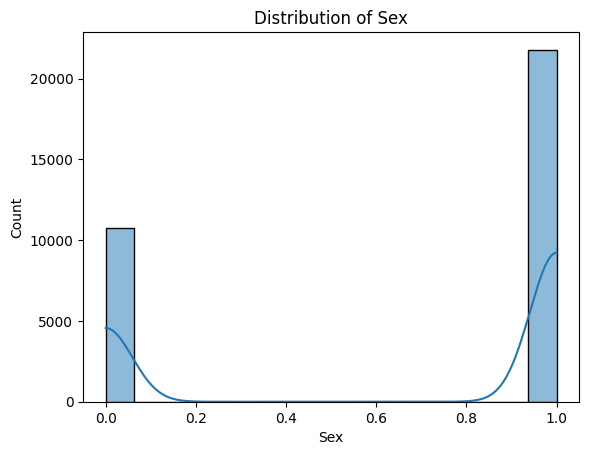

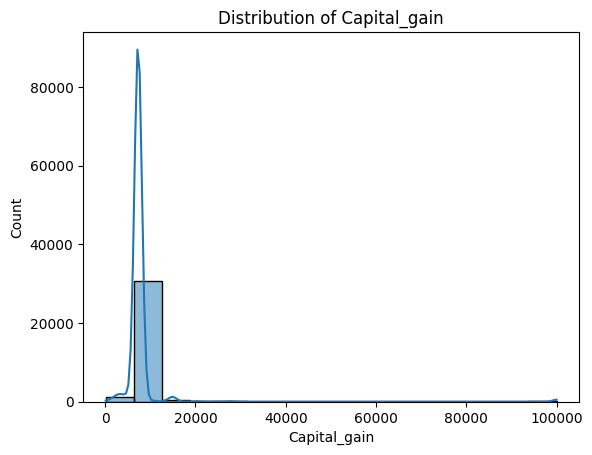

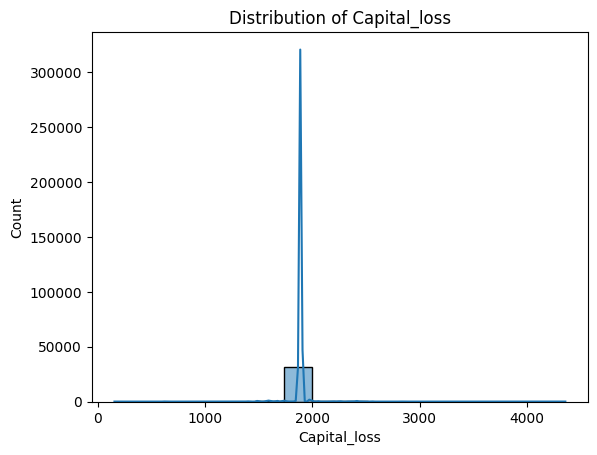

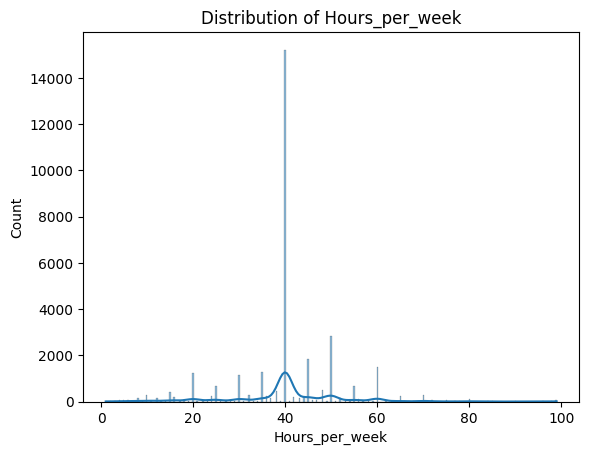

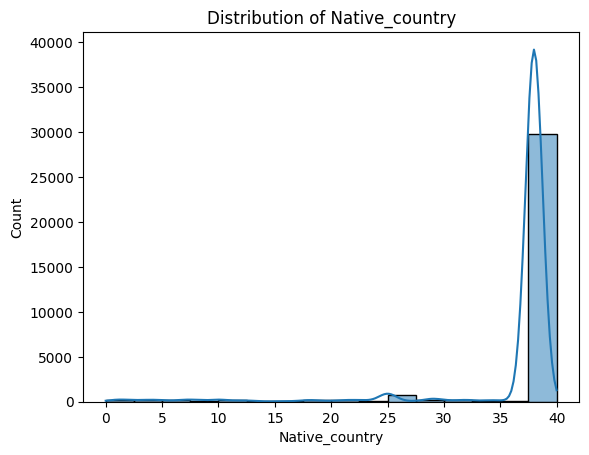

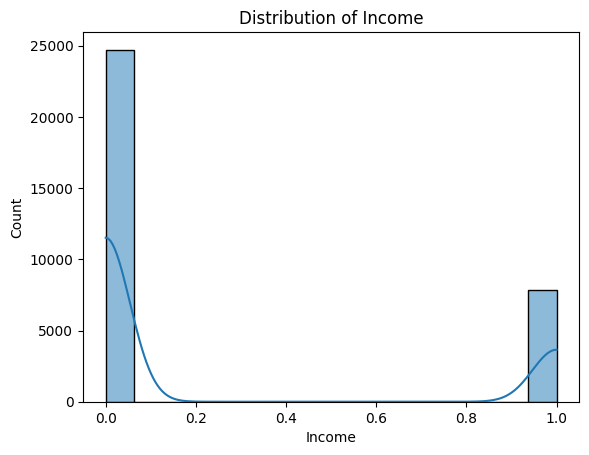

Skewness of numerical features:
 Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      13.108337
Capital_loss       1.165243
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64


In [24]:
# Distribution
for feature in df:
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    
# Check skewness
skewness = df.skew()
print('Skewness of numerical features:\n', skewness)

### Checking visualization presentation

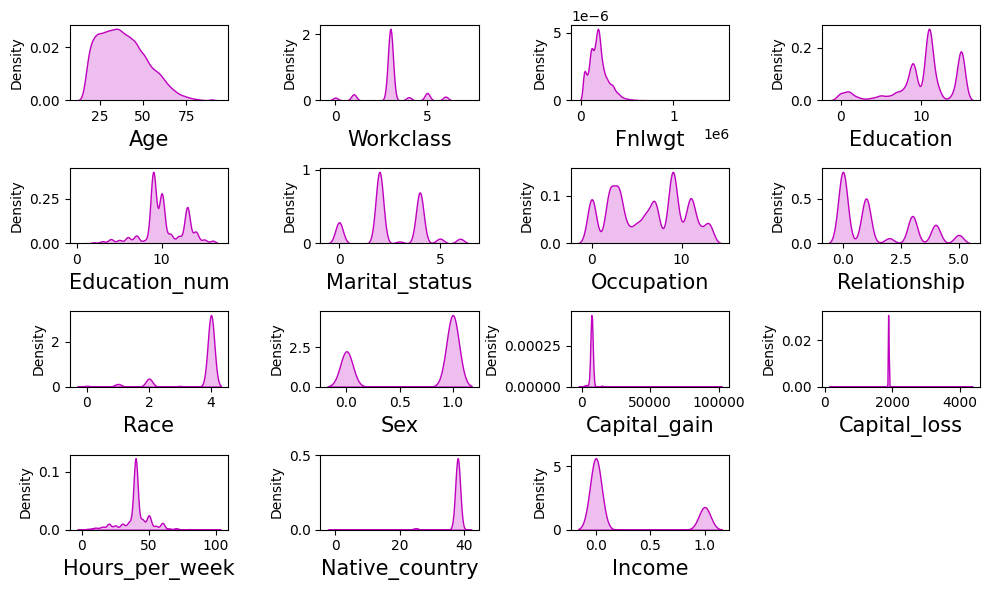

In [25]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [26]:
# Displaying.
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,7298.0,1887.0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,7298.0,1887.0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,7298.0,1887.0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,7298.0,1887.0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,7298.0,1887.0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,7298.0,1887.0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,7298.0,1887.0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,7298.0,1887.0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,7298.0,1887.0,20,38.0,0.0


##### Removing Skewness

In [27]:
# Removing the skewness by using Cube root square.
for col in df:
    if abs(skewness[col]) > 0.5:
        df[col] = np.cbrt(df[col])

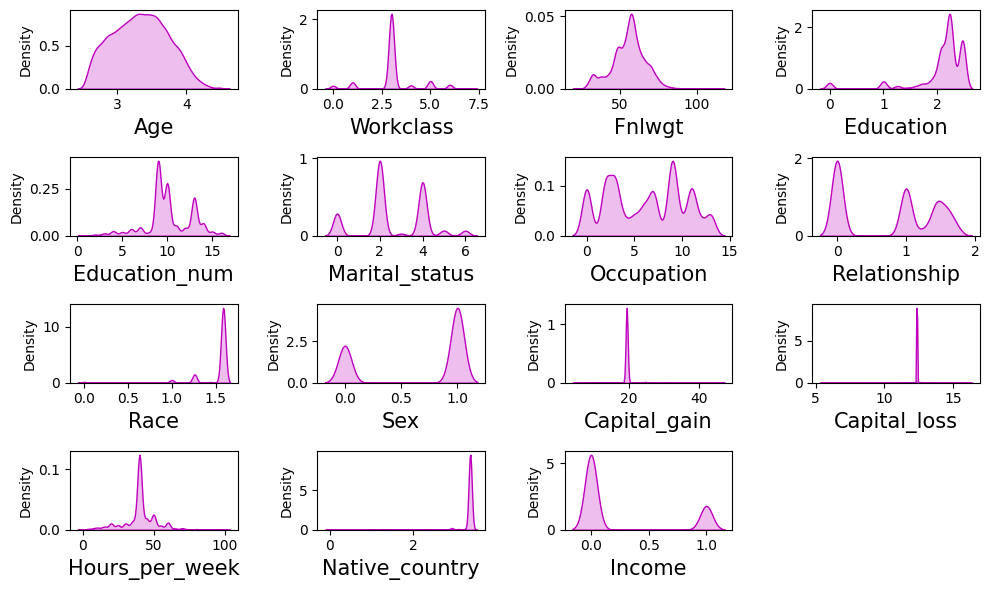

In [28]:
# Again checking the skewness.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### Outlier Detection

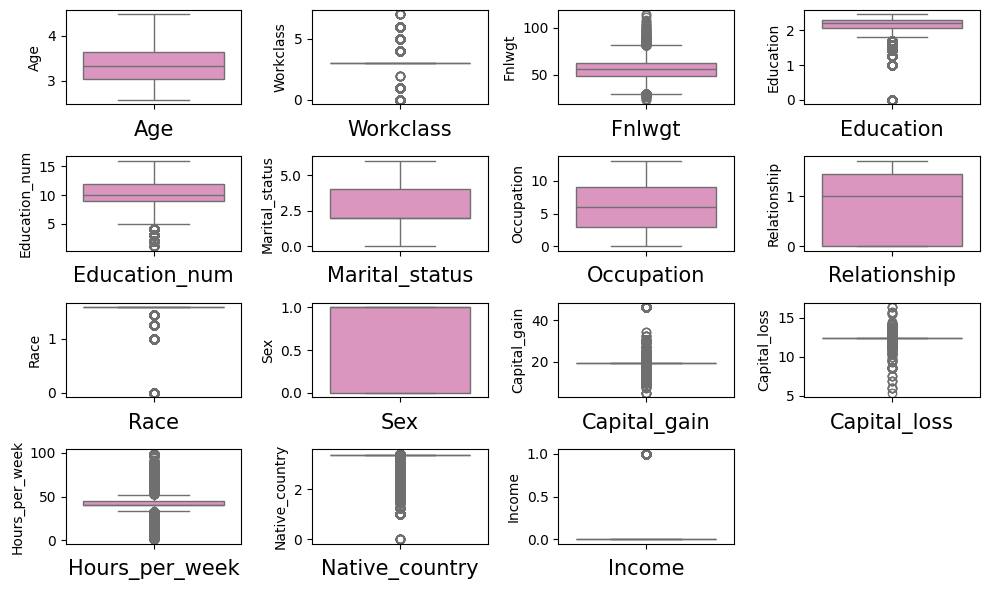

In [29]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [30]:
# Detecting and removing outliers using the IQR method.

# Function to remove outliers
def removing_outliers_from_iqr_method(df, columns):
    new_df = df.copy()
    for col in columns:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]
    return new_df

print("\nData shape before and after outlier removal:")
print("Before:", df.shape)

# Apply outlier removal
columns_to_check = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
df = removing_outliers_from_iqr_method(df, columns_to_check)

print("After:", df.shape)


Data shape before and after outlier removal:
Before: (32560, 15)
After: (19672, 15)


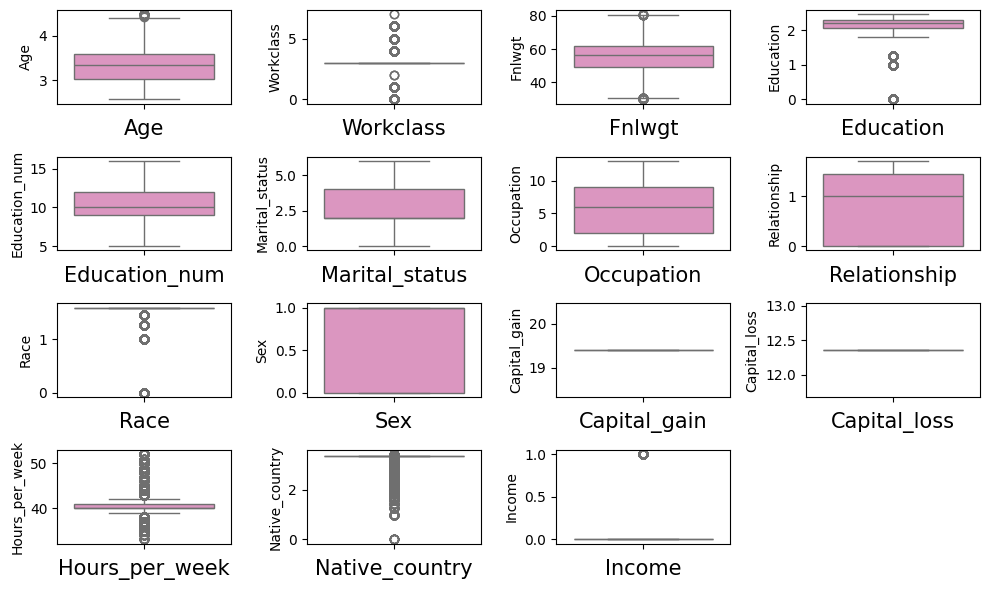

In [31]:
# Again checking the outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [32]:
# Dropping the columns which having only outliers also dropping which are not neccary.
df.drop(['Capital_loss', 'Capital_gain', 'Race', 'Workclass', 'Native_country', 'Marital_status', 'Relationship' ], axis=1, inplace=True)

# Correlation Matrix

In [33]:
# Calculate the correlation matrix
corr = df.corr()
corr

,Age,Fnlwgt,Education,Education_num,Occupation,Sex,Hours_per_week,Income
Age,1.000000,-0.073637,-0.000595,0.070729,-0.007977,0.065996,0.062440,0.262483
Fnlwgt,-0.073637,1.000000,-0.018107,-0.027429,-0.002203,0.015585,-0.023049,0.000482
Education,-0.000595,-0.018107,1.000000,0.366615,-0.027677,-0.026869,0.042766,0.079182
Education_num,0.070729,-0.027429,0.366615,1.000000,0.102405,-0.003885,0.132231,0.295920
Occupation,-0.007977,-0.002203,-0.027677,0.102405,1.000000,0.080659,0.057257,0.046556
Sex,0.065996,0.015585,-0.026869,-0.003885,0.080659,1.000000,0.177905,0.209960
Hours_per_week,0.062440,-0.023049,0.042766,0.132231,0.057257,0.177905,1.000000,0.176800
Income,0.262483,0.000482,0.079182,0.295920,0.046556,0.209960,0.176800,1.000000


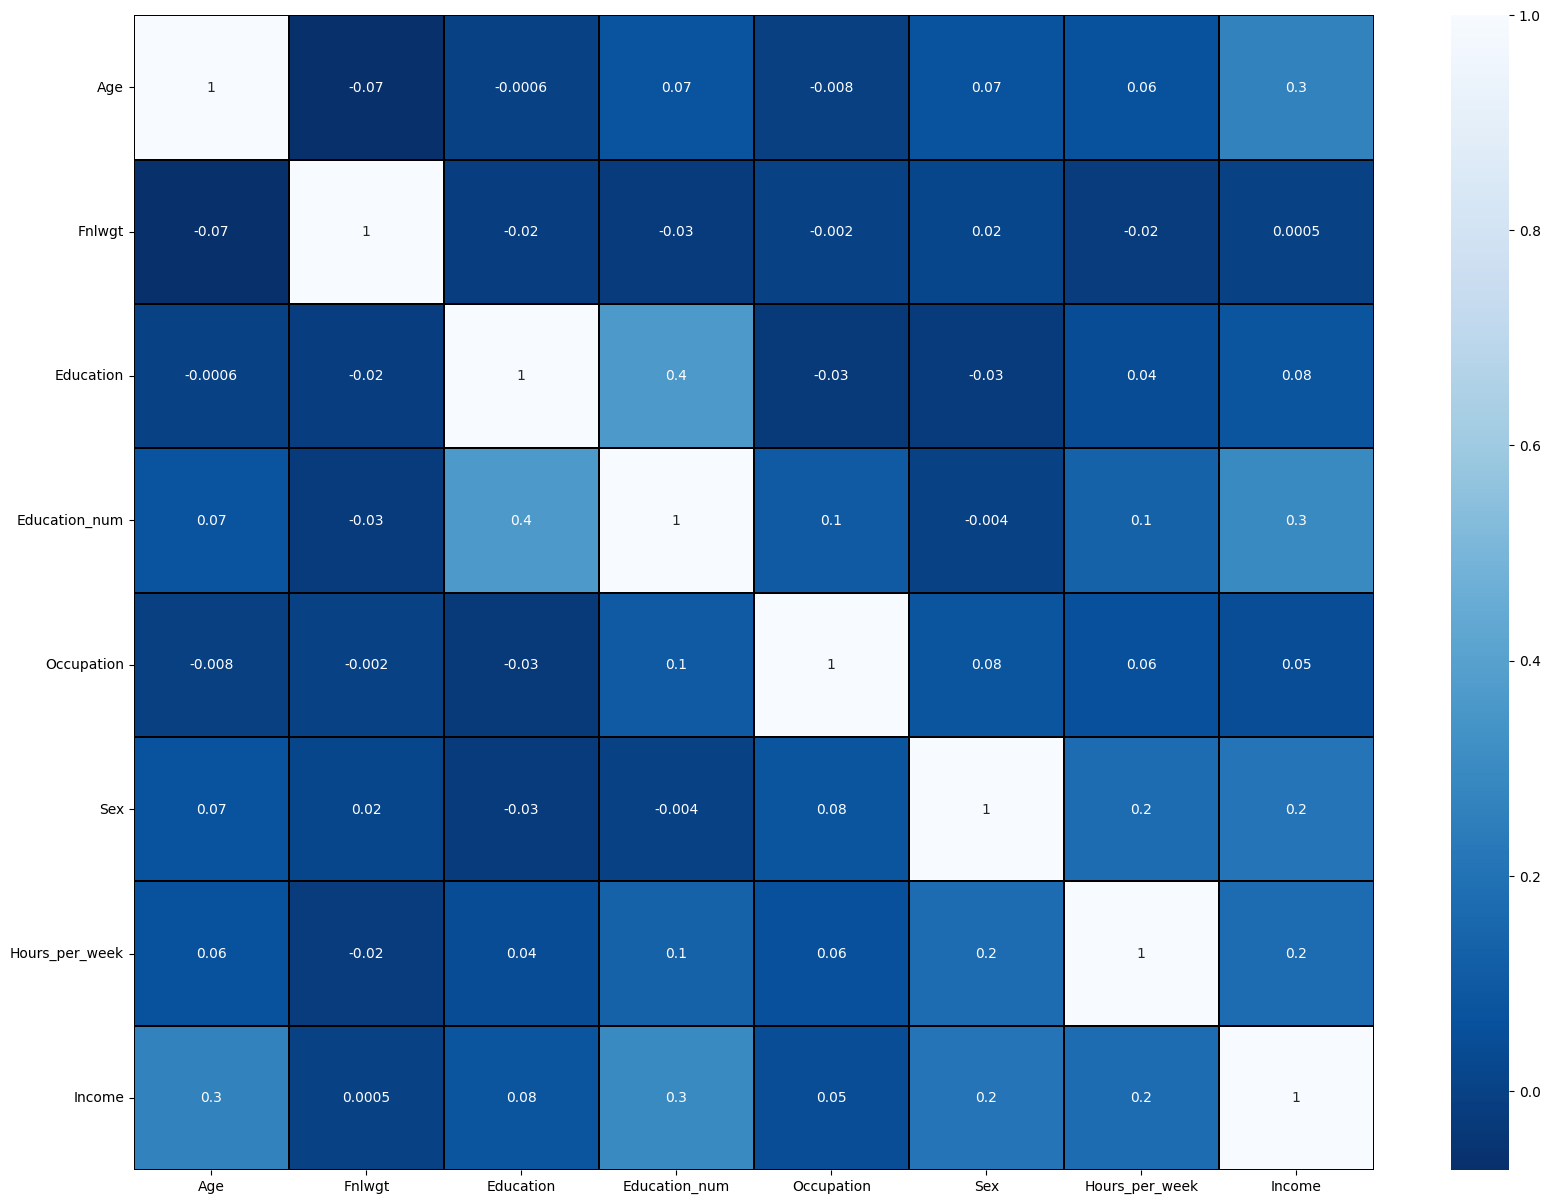

In [34]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

#### When two independent features are highly correlated, we can drop one of the columns.

In [35]:
# We can clearly see that there is no positive correlation with the target value,
# also there is not highly negative correlation with the target value.
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.295920
Age               0.262483
Sex               0.209960
Hours_per_week    0.176800
Education         0.079182
Occupation        0.046556
Fnlwgt            0.000482
Name: Income, dtype: float64

In [36]:
# Separating feature and label
x = df.drop('Income', axis=1)
y = df['Income']

In [37]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [38]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

#### So, we can clearly see that there is no multicollinearity present, so we do not need to drop columns.

In [39]:
# Displaying the vif values
vif

,VIF Values,Feature Values
0,1.017978,Age
1,1.006874,Fnlwgt
2,1.162654,Education
3,1.196648,Education_num
4,1.023684,Occupation
5,1.043964,Sex
6,1.055220,Hours_per_week


In [40]:
# Now we can move to the model building
y.value_counts()

Income
0.0    15269
1.0     4403
Name: count, dtype: int64

### We can see that there is class imbalance in the target values, so we need to address it by using an oversampling method.

### OverSampling

In [41]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x,y)

In [42]:
# Checking again
y.value_counts()

Income
0.0    15269
1.0     4403
Name: count, dtype: int64

In [43]:
# We have resolved the class imbalance issue by using oversampling method.
y1.value_counts()

Income
0.0    15269
1.0    15269
Name: count, dtype: int64

### Modelling

In [44]:
# Classification Algorithmfrom 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [46]:
# Just finding the value random State after that you can comment these line of code.
maxAcc = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
print("Best Accuracy is ", maxAcc, "at random_state ", maxRs)

Best Accuracy is  0.8534162846540057 at random_state  38


In [47]:
# Creating train test split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.30, random_state=maxRs)

# RandomForestClassifier

In [48]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)

In [49]:
print("Accuracy of this model ", accuracy_score(y_test, predRFC)*100)

print(confusion_matrix(y_test, predRFC))

print(classification_report(y_test, predRFC))

Accuracy of this model  84.80681074001309
[[3874  757]
 [ 635 3896]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      4631
         1.0       0.84      0.86      0.85      4531

    accuracy                           0.85      9162
   macro avg       0.85      0.85      0.85      9162
weighted avg       0.85      0.85      0.85      9162



In [50]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predRFC) - score.mean()

[0.75851343 0.83038638 0.89014407 0.88963485 0.8894711 ]
0.8516299641762932


-0.0035618567761622755

# ExtraTreesClassifier

In [51]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predET)*100)

print(confusion_matrix(y_test, predET))

print(classification_report(y_test, predET))

Accuracy of this model  85.04693298406461
[[3844  787]
 [ 583 3948]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      4631
         1.0       0.83      0.87      0.85      4531

    accuracy                           0.85      9162
   macro avg       0.85      0.85      0.85      9162
weighted avg       0.85      0.85      0.85      9162



In [52]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(ET, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predET) - score.mean()

[0.79846103 0.84397511 0.8845776  0.88668741 0.88504994]
0.8597502206074191


-0.009280890766772965

# GradientBoostingClassifier

In [53]:
# Checking accuracy for GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predGBC)*100)

print(confusion_matrix(y_test, predGBC))

print(classification_report(y_test, predGBC))

Accuracy of this model  80.26631739794806
[[3510 1121]
 [ 687 3844]]
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      4631
         1.0       0.77      0.85      0.81      4531

    accuracy                           0.80      9162
   macro avg       0.81      0.80      0.80      9162
weighted avg       0.81      0.80      0.80      9162



In [54]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(GBC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predGBC) - score.mean()

[0.73248199 0.793222   0.81041257 0.81431145 0.81742263]
0.7935701288171464


0.009093045162334112

# BaggingClassifier

In [55]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predBC)*100)

print(confusion_matrix(y_test, predBC))

print(classification_report(y_test, predBC))

Accuracy of this model  83.57345557738485
[[3925  706]
 [ 799 3732]]
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      4631
         1.0       0.84      0.82      0.83      4531

    accuracy                           0.84      9162
   macro avg       0.84      0.84      0.84      9162
weighted avg       0.84      0.84      0.84      9162



In [56]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(BC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predBC) - score.mean()

[0.70153897 0.81827112 0.88195809 0.87604388 0.88210251]
0.8319829124554483


0.0037516433184001663

# LogisticRegression

In [57]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predLR)*100)

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

Accuracy of this model  73.66295568653133
[[3348 1283]
 [1130 3401]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      4631
         1.0       0.73      0.75      0.74      4531

    accuracy                           0.74      9162
   macro avg       0.74      0.74      0.74      9162
weighted avg       0.74      0.74      0.74      9162



In [58]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(LR, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predLR) - score.mean()

[0.72544204 0.73722986 0.72298625 0.73129196 0.74553791]
0.7324976041213939


0.00413195274391942

# SVC

In [59]:
# Checking accuracy for SVC
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predSV)*100)

print(confusion_matrix(y_test, predSV))

print(classification_report(y_test, predSV))

Accuracy of this model  74.60161536782361
[[3134 1497]
 [ 830 3701]]
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73      4631
         1.0       0.71      0.82      0.76      4531

    accuracy                           0.75      9162
   macro avg       0.75      0.75      0.75      9162
weighted avg       0.75      0.75      0.74      9162



In [60]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(SV, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predSV) - score.mean()

[0.74148657 0.75016372 0.73690242 0.75028656 0.75356149]
0.7464801521952596


-0.0004639985170235006

### As you can see our best model is ExtraTreesClassifier and RandomForestClassifier are the best model.

In [61]:
import joblib

# Save the trained model
joblib.dump(ET, 'census_income.pkl')

print("Model saved successfully.")

Model saved successfully.


In [62]:
# Predicting the saved model
model = joblib.load('census_income.pkl')
prediction = model.predict(x_test)

In [63]:
# Confirming
a = np.array(y_test)
predicted_df = pd.DataFrame()
predicted_df['Predict'] = prediction
predicted_df['Original'] = a
predicted_df

,Predict,Original
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9157,0.0,0.0
9158,1.0,0.0
9159,1.0,1.0
9160,0.0,0.0
